In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import deepquantum as dq
import torch

# quantum u gate map

 using "map_quantum_gate"  for map the quantum gate to optical quantum circuit. \
 n_mode: 2*n_qubits + 2 \
 auxiliary modes: [0,0] or [1,0] in the last 2modes \
succcess probability: preferred 1/3 for 2qubtis, 1/4 for 3 qubits 

In [8]:
swap  = np.array([[1,0,0,0],
                  [0,0,1,0],
                 [0,1,0,0],
                 [0,0,0,1]])
iswap  = np.array([[1,0,0,0],
                  [0,0,1j,0],
                 [0,1j,0,0],
                 [0,0,0,1]])
cnot = np.array([[1,0,0,0],
                  [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])

In [3]:
mqc = dq.photonic.map_quantum_gate

In [6]:
n_qubits = 2
n_mode = 6
ugate = cnot
aux = [0,0]
aux_pos = [4,5]
success = 1/3
umap = mqc.UgateMap(n_qubits=n_qubits, n_mode=n_mode,ugate=ugate,success=success,aux=aux,aux_pos=aux_pos )

In [9]:
umap.ugate = cnot
umap.success = 1/3
Re3 = umap.solve_eqs_real( total_trials=1, trials=10,  precision=1e-5) # for real solution

True 0.274694047216559
True 0.34513934162736476ss: 0
True 0.3451369966030027ess: 0
True 0.27469534410472335ss: 0
True 1.2641599572113423e-09 0
True 0.2746937003568774ess: 1
True 0.2746929380024354ess: 1
True 0.34513373447063983ss: 1
True 0.3451324803260128ess: 1
True 2.6608132596006315e-09 1


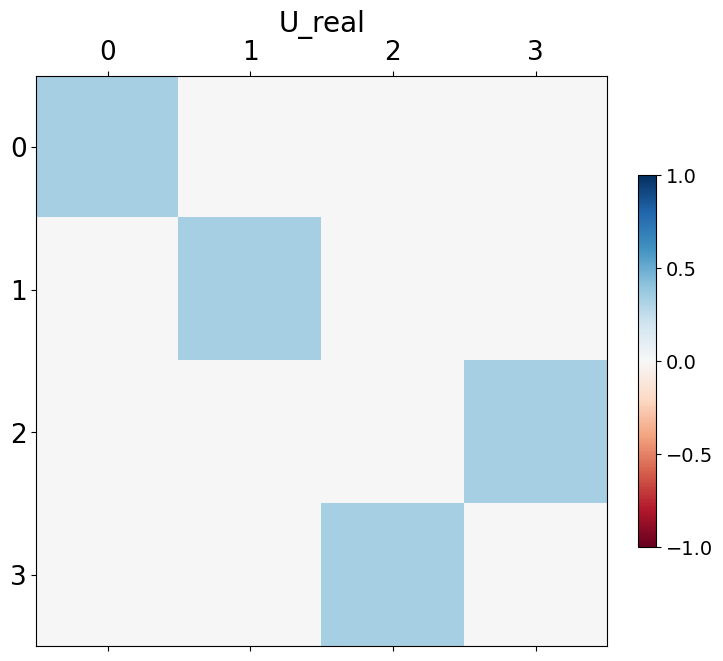

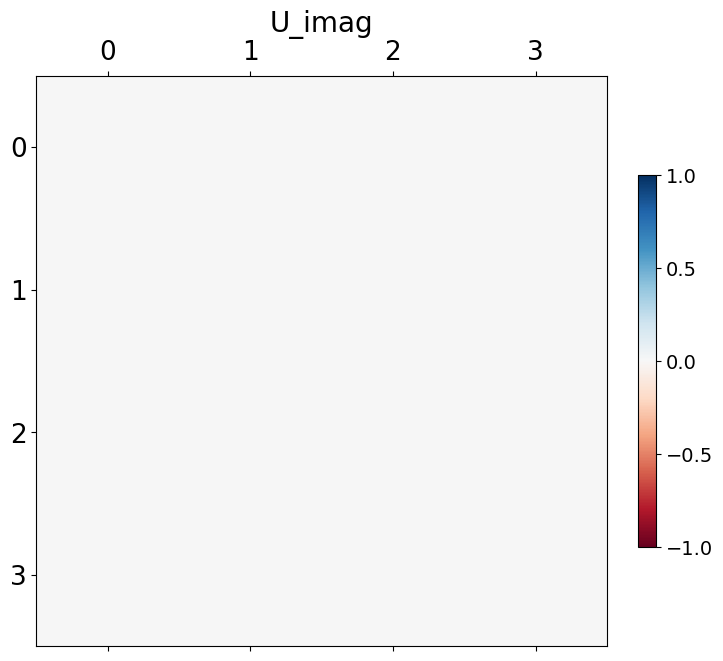

In [13]:
## check result
re = (Re3[0][0][0])
transfer_mat = umap.get_transfer_mat(re)
umap.plot_u(transfer_mat, vmin=-1)

# decompose clements

 decomposing the optical qunatum circuit(unitary matrix) to clements structure

In [15]:
dp_mzi = dq.photonic.decom_plt_clements

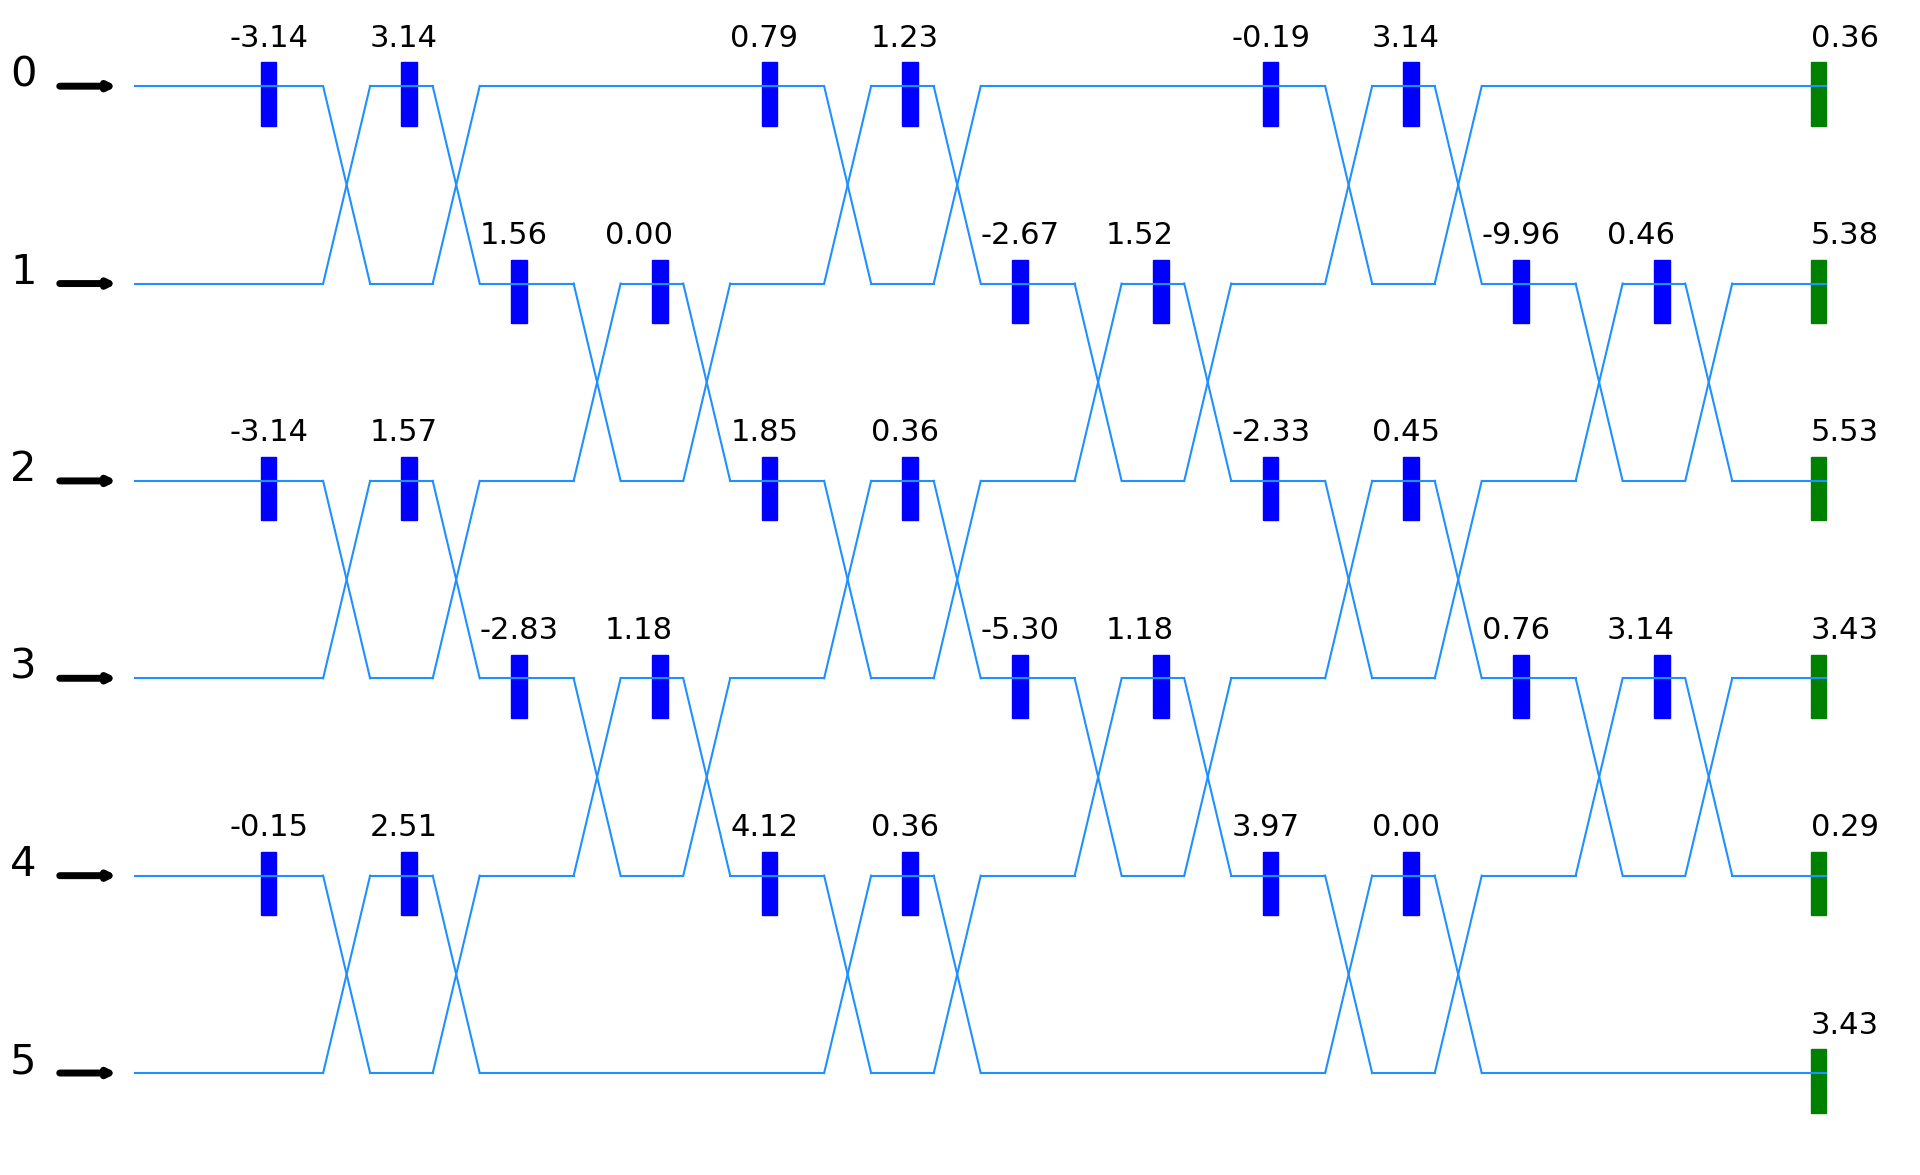

In [17]:
u6x6 = np.array([[1, 0, 1, -1, 0, 0],
                 [0, 1, 0 ,0,  0, np.sqrt(2)],
                 [1,  0, 0, 1, 1, 0],
                 [-1, 0, 1, 0, 1, 0],
                 [0,  0, 1, 1, -1,0],
                 [0, np.sqrt(2), 0,0,0,-1]])/np.sqrt(3)
p_mzi = dp_mzi.Graph_Mzi(6,u6x6)
p_mzi.plotting_clements()

In [18]:
## check the result 
p_mzi.ps_position

{(0, 0): -3.1416,
 (0, 1): 3.1416,
 (0, 2): 0.7854,
 (0, 3): 1.231,
 (0, 4): -0.186,
 (0, 5): 3.1416,
 (0, 6): 0.3559,
 (1, 0): 1.5642,
 (1, 1): 0.0,
 (1, 2): -2.6684,
 (1, 3): 1.5195,
 (1, 4): -9.9618,
 (1, 5): 0.457,
 (1, 6): 5.3768,
 (2, 0): -3.1416,
 (2, 1): 1.5708,
 (2, 2): 1.8511,
 (2, 3): 0.3627,
 (2, 4): -2.3305,
 (2, 5): 0.4455,
 (2, 6): 5.5287,
 (3, 0): -2.8258,
 (3, 1): 1.183,
 (3, 2): -5.3039,
 (3, 3): 1.183,
 (3, 4): 0.7566,
 (3, 5): 3.1416,
 (3, 6): 3.4298,
 (4, 0): -0.1518,
 (4, 1): 2.5061,
 (4, 2): 4.1209,
 (4, 3): 0.3627,
 (4, 4): 3.9691,
 (4, 5): 0.0,
 (4, 6): 0.2882,
 (5, 0): 3.4298}